In [1]:
# Import necessary modules first.
import tensorflow as tf
from tensorflow.keras.utils import load_img
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, Input
import numpy as np
import random
import matplotlib.pyplot as plt
import os 
import seaborn as sns
import warnings 
from tqdm.notebook import tqdm 
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
BASE_DIR = 'C:/Users/HP/OneDrive/Desktop/Jupyter python/kaggle projects/age and gender prediction/UTKFace'

In [3]:
image_paths = []
age_labels = []
gender_labels = []

for filename in tqdm(os.listdir(BASE_DIR)):
    image_path = os.path.join(BASE_DIR, filename)
    temp = filename.split('_')
    age = int(temp[0])
    gender = int(temp[1])
    image_paths.append(image_path)
    age_labels.append(age)
    gender_labels.append(gender)



  0%|          | 0/23708 [00:00<?, ?it/s]

In [4]:
import pandas as pd
df = pd.DataFrame()
df['image'] = image_paths
df['age'] = age_labels
df['gender'] = gender_labels
# df.head()
df.sample(5)

,image,age,gender
17011,C:/Users/HP/OneDrive/Desktop/Jupyter python/ka...,46,0
19332,C:/Users/HP/OneDrive/Desktop/Jupyter python/ka...,55,0
4100,C:/Users/HP/OneDrive/Desktop/Jupyter python/ka...,23,1
4232,C:/Users/HP/OneDrive/Desktop/Jupyter python/ka...,24,0
19360,C:/Users/HP/OneDrive/Desktop/Jupyter python/ka...,55,0


In [5]:
gender_dict = {0: 'Male', 1: 'Female'}

In [6]:
## EDA

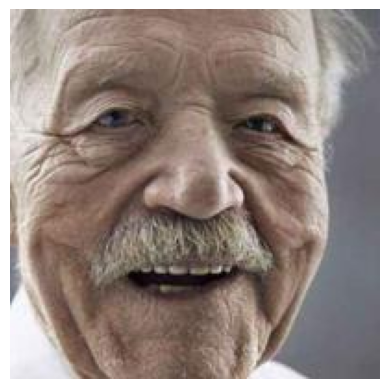

In [7]:
from PIL import Image
img = Image.open(df['image'][0])
plt.axis('off')
plt.imshow(img)

<Axes: xlabel='age', ylabel='Density'>

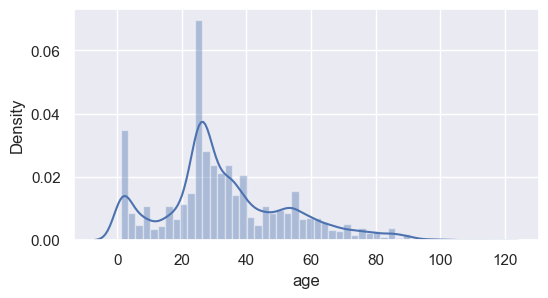

In [8]:
# sns.displot(df['age'], kde=True)
sns.set(rc={'figure.figsize':(6,3)})
sns.distplot(df['age'])

<Axes: xlabel='gender', ylabel='count'>

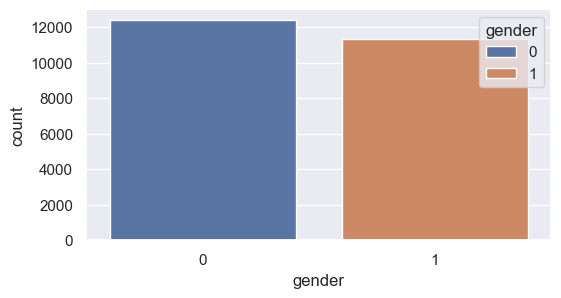

In [9]:
# sns.countplot(df['gender'])
sns.set(rc={'figure.figsize':(6,3)})
sns.countplot(x = df['gender'] , hue = df['gender'])

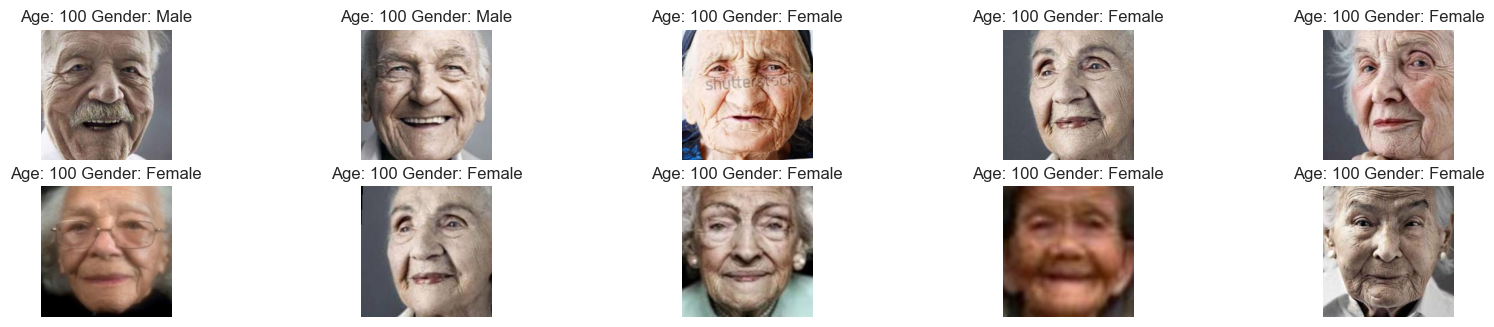

In [10]:
# # to display grid of images
# plt.figure(figsize=(8, 8))
# files = df.iloc[0:25]

# for index, file, age, gender in files.itertuples():
#     plt.subplot(12, 1, index+1)
#     img = load_img(file)
#     img = np.array(img)
#     plt.imshow(img)
#     plt.title(f"Age: {age} Gender: {gender_dict[gender]}")
#     plt.axis('off')
# to display grid of images
plt.figure(figsize=(20, 20))
files = df.iloc[0:10]

for index, file, age, gender in files.itertuples():
    plt.subplot(10, 5, index+1)
    img = load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title(f"Age: {age} Gender: {gender_dict[gender]}")
    plt.axis('off')

In [11]:
# import tensorflow as tf
# from tensorflow.keras.utils import load_img
# from tensorflow.keras.models import Sequential, Model
# from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, Input
# from tqdm import tqdm
# import numpy as np
# from keras.preprocessing.image import load_img
# from PIL import Image

# def extract_features(images):
#     features = []
#     for image in tqdm(images):
#         # Use color_mode to load the image in grayscale
#         img = load_img(image, color_mode='grayscale')
#         img = img.resize((128, 128), Image.ANTIALIAS)
#         img = np.array(img)
#         features.append(img)
        
#     features = np.array(features)
#     # Reshape features to add the channel dimension
#     features = features.reshape(len(features), 128, 128, 1)
#     return features

import tensorflow as tf
from tensorflow.keras.utils import load_img
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, Input

from tqdm import tqdm
import numpy as np
from PIL import Image

def extract_features(images):
    features = []
    for image in tqdm(images):
        # Use color_mode to load the image in grayscale
        img = load_img(image, color_mode='grayscale')
        img = img.resize((128, 128), Image.LANCZOS)  # Use Image.LANCZOS instead of Image.ANTIALIAS
        img = np.array(img)
        features.append(img)
        
    features = np.array(features)
    # Reshape features to add the channel dimension
    features = features.reshape(len(features), 128, 128, 1)
    return features



In [12]:
X = extract_features(df['image'])

100%|██████████| 23708/23708 [03:31<00:00, 112.01it/s]


In [13]:
X.shape

(23708, 128, 128, 1)

In [14]:
y_gender = np.array(df['gender'])
y_age = np.array(df['age'])
input_shape = (128, 128, 1)

In [15]:
inputs = Input((input_shape))
# convolutional layers
conv_1 = Conv2D(32, kernel_size=(3, 3), activation='relu') (inputs)
maxp_1 = MaxPooling2D(pool_size=(2, 2)) (conv_1)
conv_2 = Conv2D(64, kernel_size=(3, 3), activation='relu') (maxp_1)
maxp_2 = MaxPooling2D(pool_size=(2, 2)) (conv_2)
conv_3 = Conv2D(128, kernel_size=(3, 3), activation='relu') (maxp_2)
maxp_3 = MaxPooling2D(pool_size=(2, 2)) (conv_3)
conv_4 = Conv2D(256, kernel_size=(3, 3), activation='relu') (maxp_3)
maxp_4 = MaxPooling2D(pool_size=(2, 2)) (conv_4)

flatten = Flatten() (maxp_4)

# fully connected layers
dense_1 = Dense(256, activation='relu') (flatten)
dense_2 = Dense(256, activation='relu') (flatten)

dropout_1 = Dropout(0.3) (dense_1)
dropout_2 = Dropout(0.3) (dense_2)

output_1 = Dense(1, activation='sigmoid', name='gender_out') (dropout_1)
output_2 = Dense(1, activation='relu', name='age_out') (dropout_2)

model = Model(inputs=[inputs], outputs=[output_1, output_2])

model.compile(loss=['binary_crossentropy', 'mae'], optimizer='adam', metrics=['accuracy'])

In [22]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 126, 126,  │        320 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 63, 63,    │          0 │ conv2d[0][0]      │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 61, 61,    │     18,496 │ max_pooling2d[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 30, 30,    │          0 │ conv2d_1[0][0]    │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 28, 28,    │     73,856 │ max_pooling2d_1[… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 14, 14,    │          0 │ conv2d_2[0][0]    │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 12, 12,    │    295,168 │ max_pooling2d_2[… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_3     │ (None, 6, 6, 256) │          0 │ conv2d_3[0][0]    │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 9216)      │          0 │ max_pooling2d_3[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 256)       │  2,359,552 │ flatten[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 256)       │  2,359,552 │ flatten[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 256)       │          0 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 256)       │          0 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ gender_out (Dense)  │ (None, 1)         │        257 │ dropout[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ age_out (Dense)     │ (None, 1)         │        257 │ dropout_1[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 5,107,458 (19.48 MB)

 Trainable params: 5,107,458 (19.48 MB)

 Non-trainable params: 0 (0.00 B)

In [25]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.optimizers import Adam

# Compile the model with appropriate metrics for each output
model.compile(
    optimizer=Adam(),
    loss=['binary_crossentropy', 'mean_squared_error'],  # Assuming binary crossentropy for gender and MSE for age
    metrics=[['accuracy'], ['mae']]  # Using accuracy for gender and mean absolute error for age
)

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=1, restore_best_weights=True)
reduce_learningrate = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, verbose=1, min_delta=0.0001)
callbacks_list = [early_stopping, reduce_learningrate]

# Fit the model
history = model.fit(
    x=X,
    y=[y_gender, y_age],
    batch_size=16,
    epochs=30,
    validation_split=0.2,
    callbacks=callbacks_list
)


Epoch 1/30
1186/1186 ━━━━━━━━━━━━━━━━━━━━ 195s 161ms/step - age_out_mae: 28.6696 - gender_out_accuracy: 0.7102 - loss: 1454.7731 - val_age_out_mae: 33.6432 - val_gender_out_accuracy: 0.5835 - val_loss: 1366.7001 - learning_rate: 0.0010
Epoch 2/30
1186/1186 ━━━━━━━━━━━━━━━━━━━━ 197s 166ms/step - age_out_mae: 8.9717 - gender_out_accuracy: 0.7251 - loss: 140.8759 - val_age_out_mae: 29.2362 - val_gender_out_accuracy: 0.7644 - val_loss: 1082.3416 - learning_rate: 0.0010
Epoch 3/30
1186/1186 ━━━━━━━━━━━━━━━━━━━━ 203s 171ms/step - age_out_mae: 7.1963 - gender_out_accuracy: 0.7889 - loss: 94.8880 - val_age_out_mae: 22.7258 - val_gender_out_accuracy: 0.7132 - val_loss: 648.1133 - learning_rate: 0.0010
Epoch 4/30
1186/1186 ━━━━━━━━━━━━━━━━━━━━ 214s 180ms/step - age_out_mae: 6.8626 - gender_out_accuracy: 0.7898 - loss: 86.4942 - val_age_out_mae: 23.2979 - val_gender_out_accuracy: 0.7699 - val_loss: 700.2044 - learning_rate: 0.0010
Epoch 5/30
1186/1186 ━━━━━━━━━━━━━━━━━━━━ 223s 188ms/step - age_ou

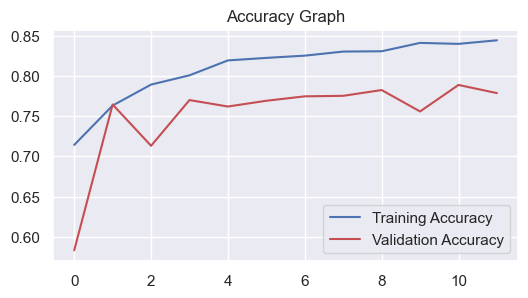

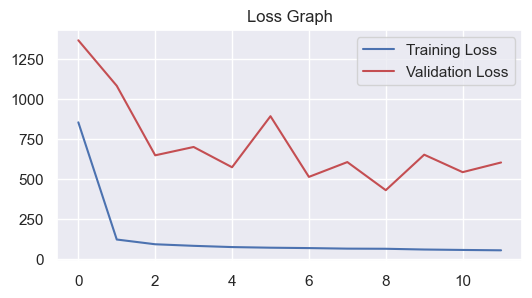

In [27]:
# plot results for gender
acc = history.history['gender_out_accuracy']
val_acc = history.history['val_gender_out_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()

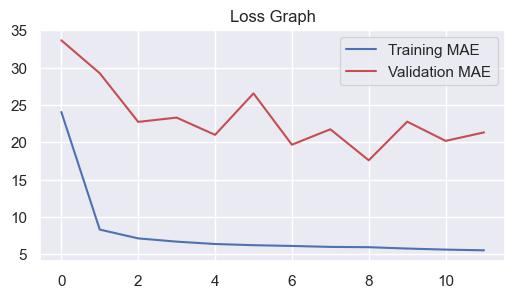

In [29]:
# plot results for age
loss = history.history['age_out_mae']
val_loss = history.history['val_age_out_mae']
epochs = range(len(loss))

plt.plot(epochs, loss, 'b', label='Training MAE')
plt.plot(epochs, val_loss, 'r', label='Validation MAE')
plt.title('Loss Graph')
plt.legend()
plt.show()

Original Gender: Male Original Age: 10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted Gender: Male Predicted Age: 17


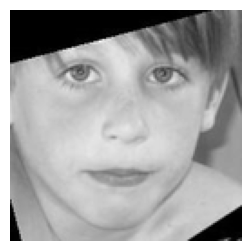

In [81]:
# image_index = 10
# print("Original Gender:", gender_dict[y_gender[image_index]], "Original Age:", y_age[image_index])
# # predict from model
# pred = model.predict(X[image_index].reshape(1, 128, 128, 1))
# pred_gender = gender_dict[round(pred[0][0][0])]
# pred_age = round(pred[1][0][0])
# print("Predicted Gender:", pred_gender, "Predicted Age:", pred_age)
# plt.axis('off')
# plt.imshow(X[image_index].reshape(128, 128), cmap='gray');

image_index = 28
print("Original Gender:", gender_dict[y_gender[image_index]], "Original Age:", y_age[image_index])
# predict from model
pred = model.predict(X[image_index].reshape(1, 128, 128, 1))
pred_gender = gender_dict[round(pred[0][0][0])]
pred_age = round(pred[1][0][0])
print("Predicted Gender:", pred_gender, "Predicted Age:", pred_age)
plt.axis('off')
plt.imshow(X[image_index].reshape(128, 128), cmap='gray')

Original Gender: Male Original Age: 21
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Predicted Gender: Male Predicted Age: 26


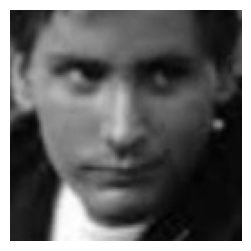

In [80]:

image_index = 3001
print("Original Gender:", gender_dict[y_gender[image_index]], "Original Age:", y_age[image_index])
# predict from model
pred = model.predict(X[image_index].reshape(1, 128, 128, 1))
pred_gender = gender_dict[round(pred[0][0][0])]
pred_age = round(pred[1][0][0])
print("Predicted Gender:", pred_gender, "Predicted Age:", pred_age)
plt.axis('off')
plt.imshow(X[image_index].reshape(128, 128), cmap='gray')

Original Gender: Female Original Age: 29
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Predicted Gender: Female Predicted Age: 32


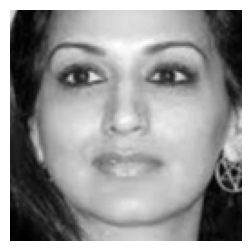

In [79]:
image_index = 10000
print("Original Gender:", gender_dict[y_gender[image_index]], "Original Age:", y_age[image_index])
# predict from model
pred = model.predict(X[image_index].reshape(1, 128, 128, 1))
pred_gender = gender_dict[round(pred[0][0][0])]
pred_age = round(pred[1][0][0])
print("Predicted Gender:", pred_gender, "Predicted Age:", pred_age)
plt.axis('off')
plt.imshow(X[image_index].reshape(128, 128), cmap='gray')